# Basic Macrospin Example #
Author: Colin Jermain, Minh-Hai Nguyen

A basic example of a macrospin simulation is demonstrated. Consider the case of a single macrospin in the presence of only an external field of 1 kOe along the $\hat{y}$ axis. The moment is initially along -$\hat{x}$. The moment will rotate to align with the external field based on the Landau-Lifshitz-Gilbert (LLG) equation.

The `BasicKernel` only includes the presence of demag and external fields so that there is no computational penalty for unused additional features, such as spin-transfer-torque or anisotropy.

In [1]:
import sys, importlib
sys.path.append("../")

In [2]:
import numpy as np
import pymacrospin.parameters as params
import pymacrospin.kernels as kernels

In [3]:
# %matplotlib inline
import matplotlib.pyplot as plt

### Setting up the kernel ###

In [4]:
parameters = {
    'Ms': 140, # Saturation Magnetization (emu/cc)
    'dt': 1e-12, # Timestep (sec)
    'damping': 0.01, # Gilbert damping
    'Hext': [0., 1e3, 0.], # External field (Oe)
    'm0': [-0.999, 0.001, 0.0001], # Initial moment (normalized)
    'Nd': [0, 0, 0], # Demagnetization diagonal tensor elements
}

In [5]:
kernel = kernels.BasicKernel(**parameters)

### Running the kernel ###
Now the kernel is ready to be used. The simulations are run for 10 ns, and then the results are plotted.

In [6]:
kernel.reset()
times1, moments1 = kernel.run(10e-9, num_points=1000)

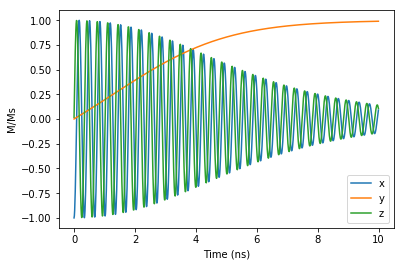

In [7]:
plt.plot(times1*1e9, moments1[:,0], label='x')
plt.plot(times1*1e9, moments1[:,1], label='y')
plt.plot(times1*1e9, moments1[:,2], label='z')
plt.ylim(-1.1, 1.1)
plt.ylabel("M/Ms")
plt.xlabel("Time (ns)")
plt.legend()
plt.show()

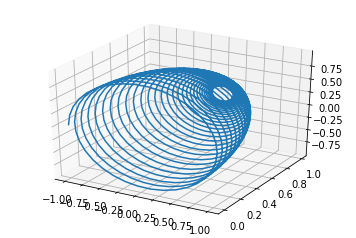

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(moments1[:,0], moments1[:,1], moments1[:,2])
plt.show()

The moment is seen to rotate to point along the $\hat{y}$ direction of the external field as expected.

In [9]:
energies = kernel.energy_surface()

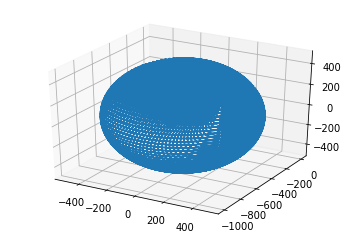

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(energies[:,0], energies[:,1], energies[:,2])
plt.show()

### Continuing the simulation ###
The kernel can continue where it left off. Below, the kernel is run for another 10ns and plotted.

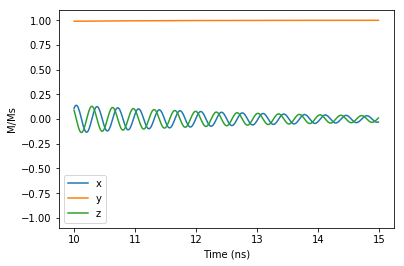

In [16]:
times2, moments2 = kernel.run(5e-9,num_points=500)
plt.plot(times2*1e9, moments2[:,0], label='x')
plt.plot(times2*1e9, moments2[:,1], label='y')
plt.plot(times2*1e9, moments2[:,2], label='z')
plt.ylim(-1.1, 1.1)
plt.ylabel("M/Ms")
plt.xlabel("Time (ns)")
plt.legend()
plt.show()

Since the moment has been stable since roughly 12 ns, the orientation does not change.

### Resetting the kernel ###
The kernel can be reset to use its initial conditions with the `reset` method. The simulations are re-started from $t=0$.

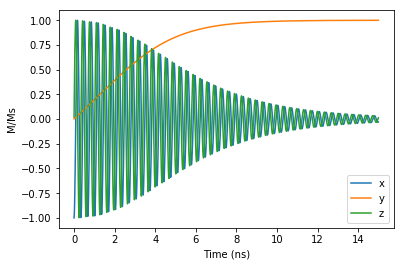

In [6]:
kernel.reset()
times3, moments3 = kernel.run(15e-9,num_points=1000)
plt.plot(times3*1e9, moments3[:,0], label='x')
plt.plot(times3*1e9, moments3[:,1], label='y')
plt.plot(times3*1e9, moments3[:,2], label='z')
plt.ylim(-1.1, 1.1)
plt.ylabel("M/Ms")
plt.xlabel("Time (ns)")
plt.legend()
plt.show()

## Running the stabilize method ##
When the moment orientation in equilibrium is of more interest than the time dependent behavior of the moment, the `relax` or `stabilize` method can be used to run the simulation until the orientation has stabilized. Both come with the option to specify the maximum time `max_time` to avoid perpetual precession.

* `relax` method: Stability is measured by the energy variation within a specified threshold `precision`.
* `stabilize` method: Stability is measured by the magnitude of the moment variation $\Delta m$. The default threshold is `1e-3`, which has been found experimentally to work well.

#### Relax method ####

In [18]:
kernel.reset()
kernel.relax(precision=1e-3,max_time=1e-7)

In [19]:
kernel.m

array([-0.02684305,  0.9990709 ,  0.03371743], dtype=float32)

The kernel moment is observed to point along the $\hat{y}$ direction.

In [20]:
kernel.t_sec

1.3e-08

Stability has been achieved at $t=13$ ns.

#### Stabilize method ####

In [7]:
kernel.reset()
kernel.stabilize(threshold=1e-3,max_time=100e-9)

In [8]:
kernel.m

array([-0.02684305,  0.9990709 ,  0.03371743], dtype=float32)

The kernel moment is observed to point along the $\hat{y}$ direction.

In [9]:
kernel.t_sec

1.3999999999999998e-08

Stability has been achieved at $t=14$ ns.

## Performance Benchmark ##

We measure the time it takes to simulate the simple example above.

#### Core kernel ####

In [18]:
%%timeit
kernel.reset()
times1, moments1 = kernel.run(10e-9, num_points=1000)

2.22 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Numba kernel ####

In [19]:
%%timeit
kernel.reset()
times1, moments1 = kernel.run(10e-9, num_points=1000)

36 ms ± 671 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
